In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1. Load the dataset
df = pd.read_csv('data_8.csv')

# 2. Check for missing values
print(df.isnull().sum())

# 3. Fill missing values with mode
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# 4. Convert string values to float in frame rate and frame rate(est.) columns
df['frame rate'] = pd.to_numeric(df['frame rate'], errors='coerce')
df['frame rate(est.)'] = pd.to_numeric(df['frame rate(est.)'], errors='coerce')

# 5. Remove rows with NaN values in frame rate and frame rate(est.) columns
df = df.dropna(subset=['frame rate', 'frame rate(est.)'])

# 6. Encoding categorical variables
le = LabelEncoder()
df['codec'] = le.fit_transform(df['codec'])
df['category'] = le.fit_transform(df['category'])

# 7. Print out the preprocessed dataframe and save
print(df.head())
df.to_csv('preprocessed_data_8.csv', index=False)

# 8. Oversample the minority class using SMOTE
# Store id column separately and then drop it from the dataframe
id_col = df['id']
df = df.drop(columns='id')
sm = SMOTE(random_state=42)
X = df.drop(columns='category')
# Check and handle missing values in category column
df['category'].fillna(df['category'].mode()[0], inplace=True)
y = df['category']
X_res, y_res = sm.fit_resample(X, y)
# Create a new dataframe with resampled data
df_resampled = pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.DataFrame(y_res, columns=['category'])], axis=1)
# Re-add the id column
df_resampled = pd.concat([id_col, df_resampled], axis=1)

# 9. Print out the preprocessed dataframe and save
print(df_resampled.head())
df_resampled.to_csv('new_data_8.csv', index=False)

id                  0
duration            0
bitrate             0
bitrate(video)      0
height              0
width               0
frame rate          0
frame rate(est.)    0
codec               0
category            0
dtype: int64
            id  duration  bitrate  bitrate(video)  height  width  frame rate  \
0  uDNj-_5ty48       267      373             274     568    320       29.97   
1  uDNj-_5ty48       267      512             396     480    270       29.97   
2  uDNj-_5ty48       267      324             263     400    226       29.97   
3  uDNj-_5ty48       267       85              55     176    144       12.00   
4  WCgt-AactyY        31     1261            1183     640    480       24.00   

   frame rate(est.)  codec  category  
0              0.00      1         7  
1             29.97      1         7  
2             29.97      0         7  
3             12.00      2         7  
4              0.00      1        10  
            id  duration  bitrate  bitrate(video)  h

# 数据预处理模块
## 数据介绍
id：YouTube视频id
duration：视频的持续时间（单位不清，可能是秒）
bitrate：视频比特率（总的，单位为千位每秒，Kbits）
bitrate(video)：视频比特率（视频部分，单位为千位每秒，Kbits）
height：视频的高度（单位为像素）
width：视频的宽度（单位为像素）
frame rate：视频的实际帧率
frame rate(est.)：视频的估计帧率
codec：用于视频的编码标准
category：YouTube视频类别

## 数据文件介绍
### data_8.csv
原始数据文件
### preprocessed_data_8.csv
经过了填补缺失值、编码字符串列、去除错误值后的数据文件
### new_data_8.csv
后续可视化分析发现数据不平衡，采用SMOTE过采样进行数据平衡后的数据文件

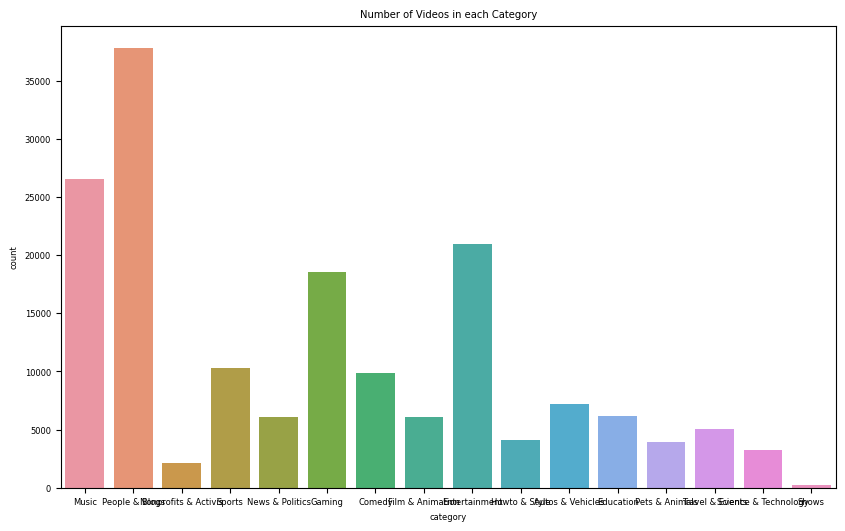

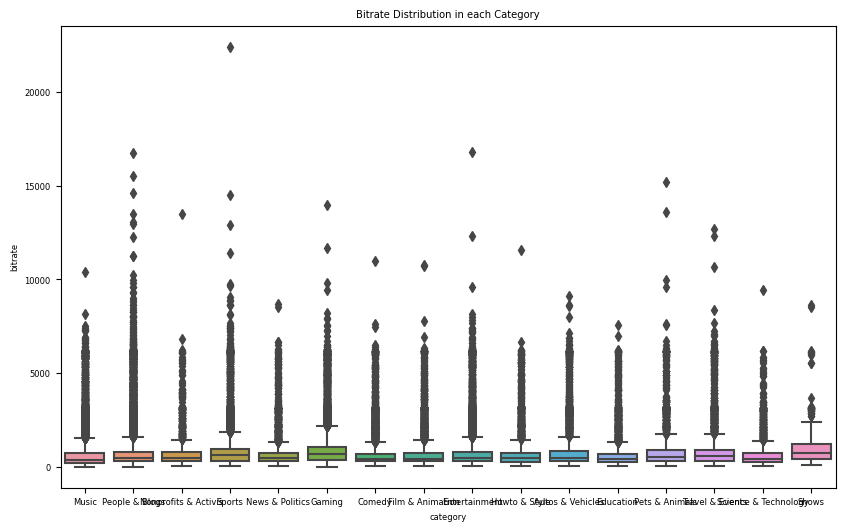

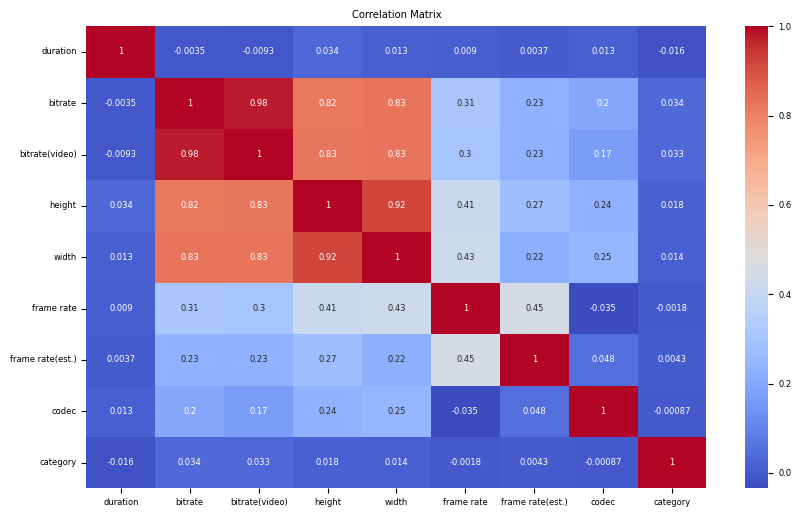

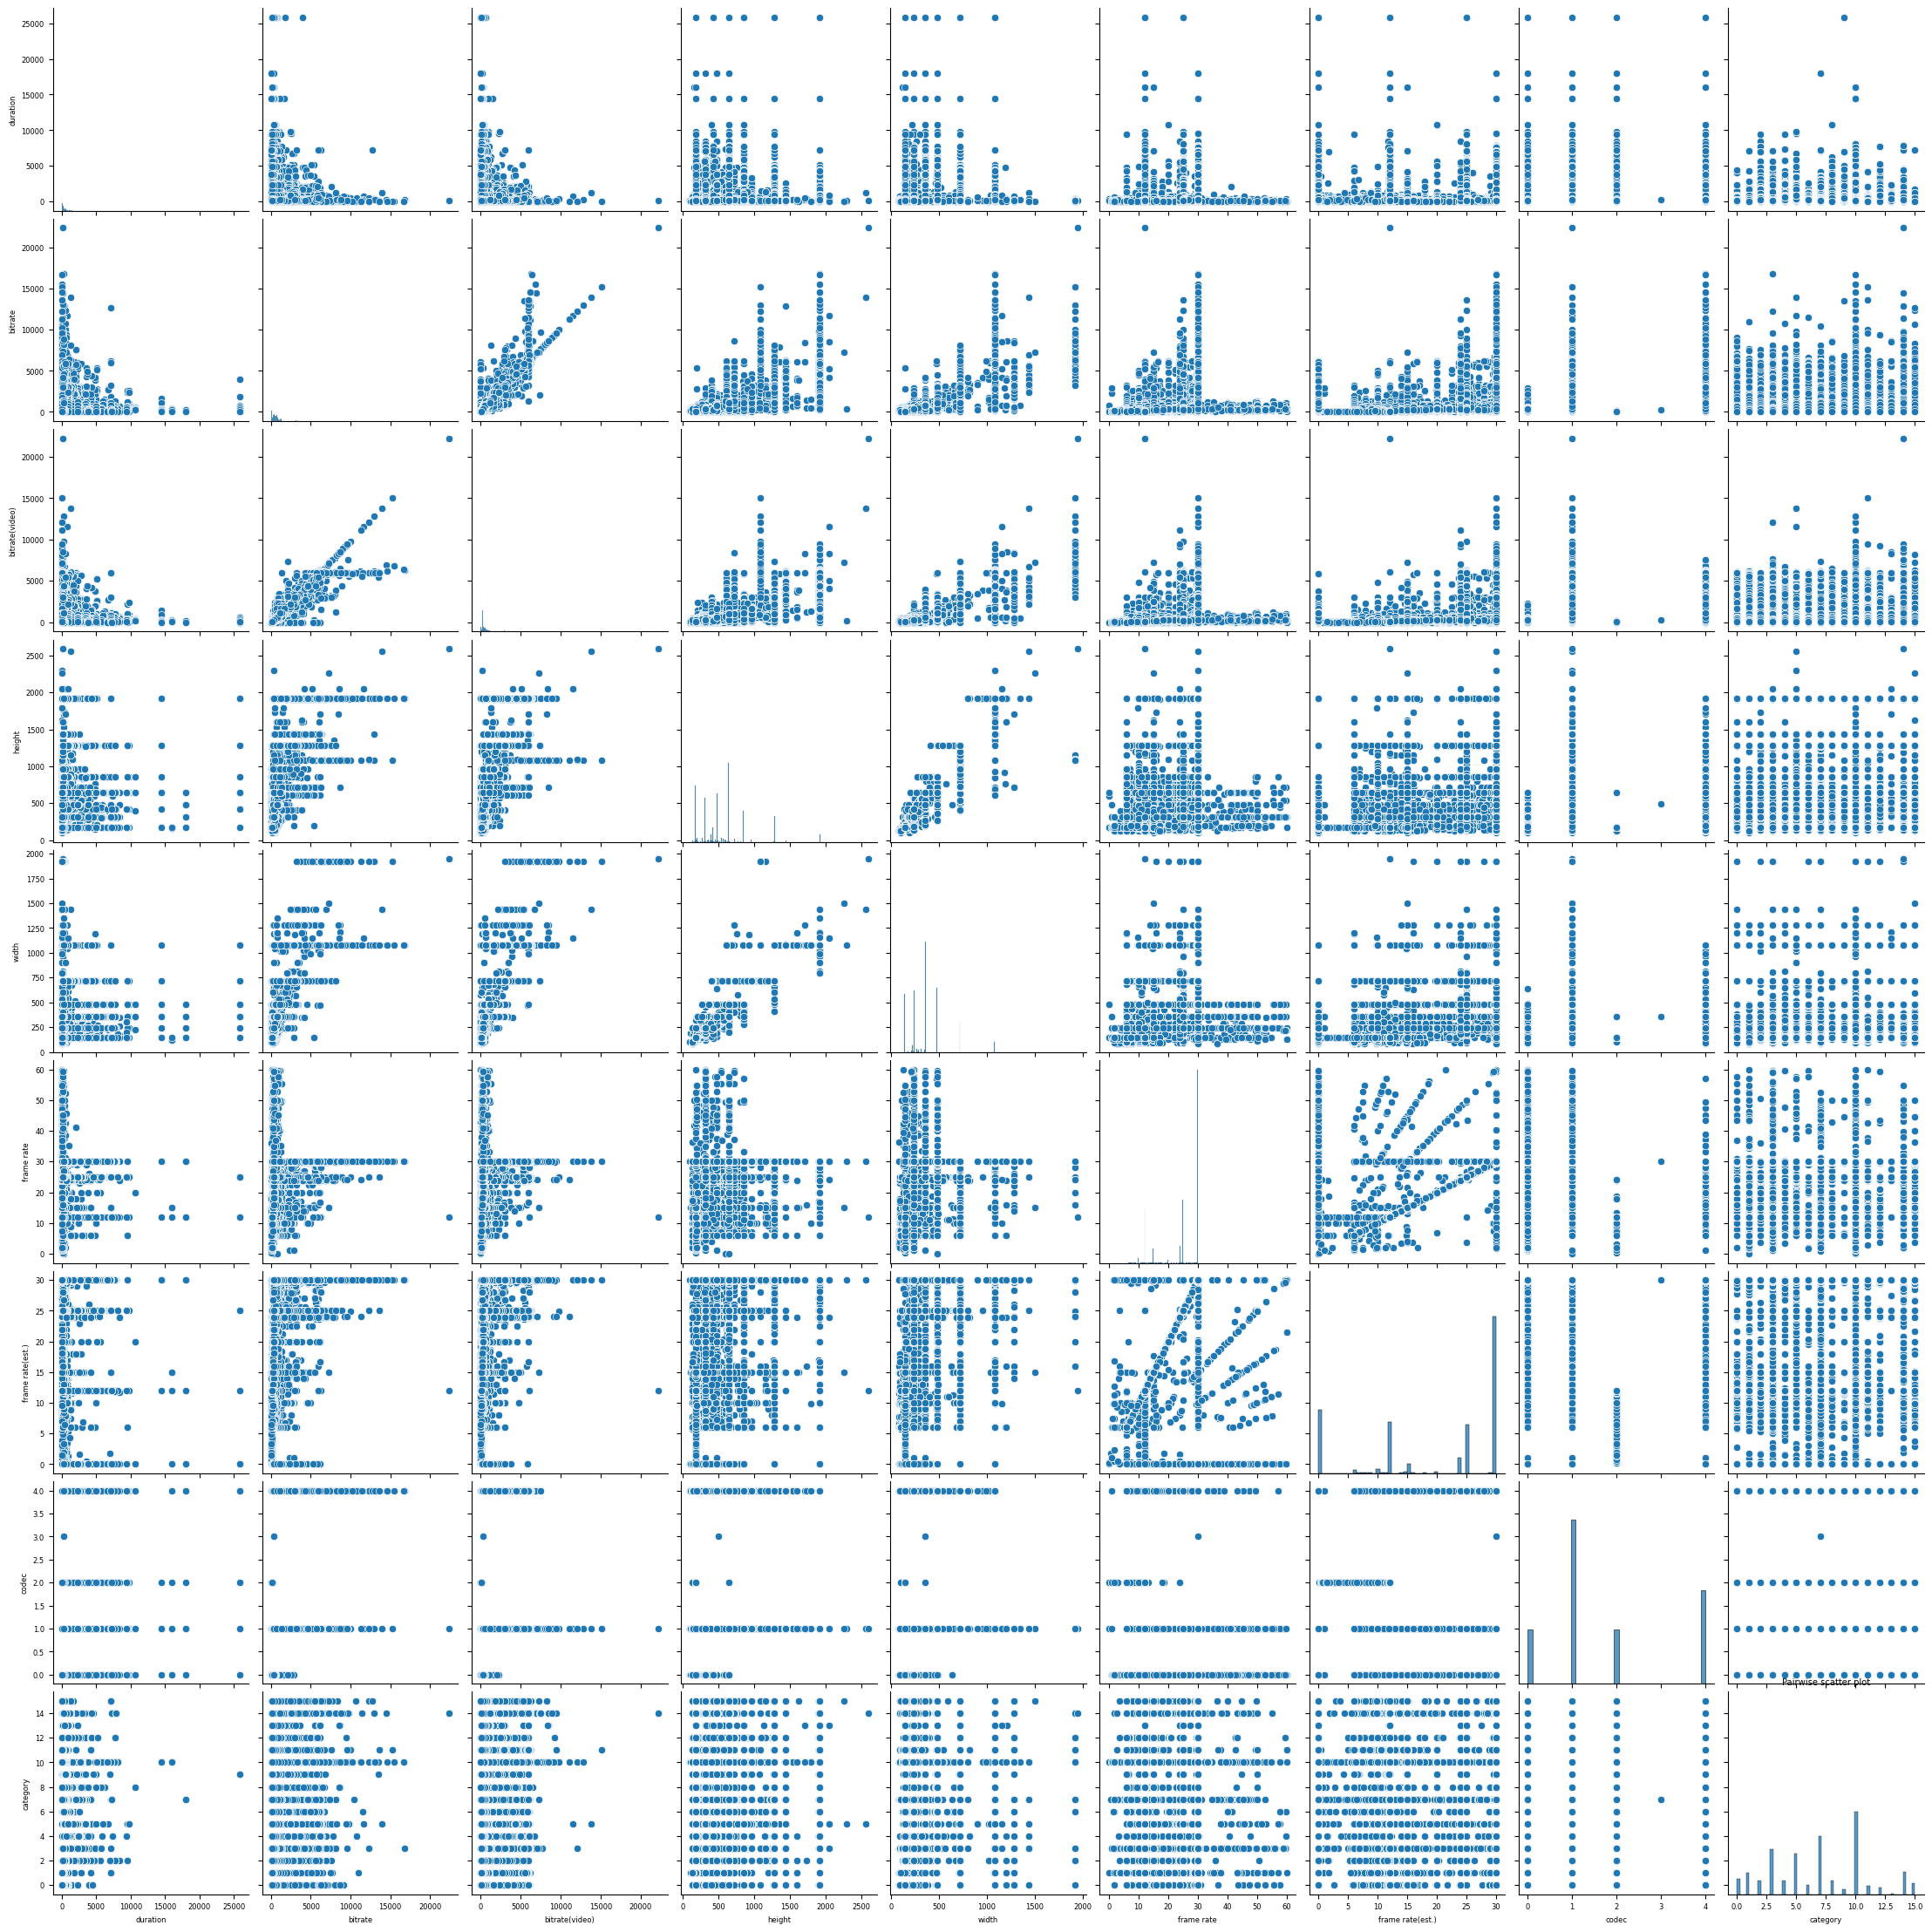

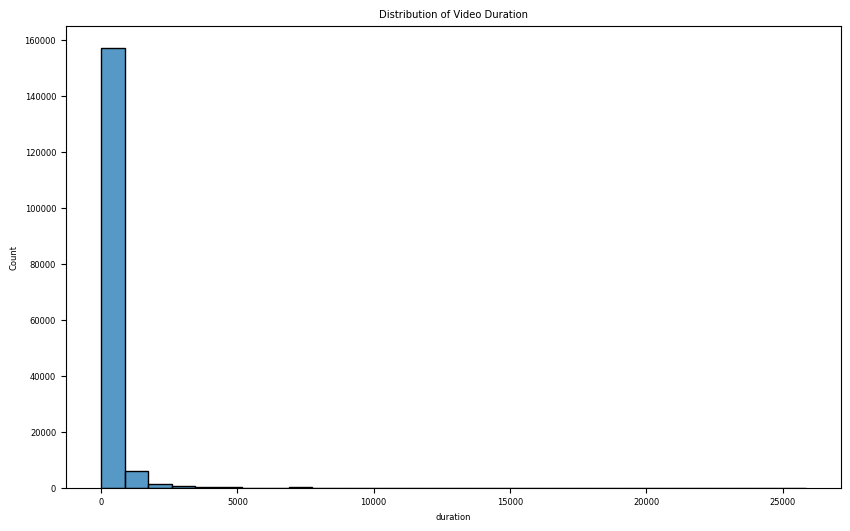

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('data_8.csv')
# Set the font size
plt.rcParams['font.size'] = 6

# 1. Bar Plot
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='category')
plt.title('Number of Videos in each Category')
plt.show()

# 2. Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='bitrate')
plt.title('Bitrate Distribution in each Category')
plt.show()

df = pd.read_csv('preprocessed_data_8.csv')
# 3.Heatmap
# Create a copy of the dataframe only with numeric columns
df_numeric = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Scatter Plot
# Pairwise scatter plot
sns.pairplot(df_numeric)
plt.title('Pairwise scatter plot')
plt.show()

# 5. Histogram
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='duration', bins=30)
plt.title('Distribution of Video Duration')
plt.show()

# 数据可视化模块
## 各种图的概念介绍
条形图（Bar Plot）：它可以帮助我们理解每个视频类别中的视频数量。
箱型图（Box Plot）：它可以帮助我们理解每个类别的视频比特率分布。
热力图（Heatmap）：用于显示特征间的相关性。
散点图（Scatter Plot）：可以查看两个特征之间的关系，例如帧率和比特率。
直方图（Histogram）：可以帮助我们理解单个特征的分布，例如视频的持续时间。

如何理解箱型图（Box Plot）：
箱型图（Box Plot）是一种用于展示数据分布情况的图形，包括中位数、四分位数、极值等统计量。以下是一个箱型图的主要组成部分：
箱子的上边缘和下边缘分别表示上四分位数（Q3，即75%分位数）和下四分位数（Q1，即25%分位数）。箱子的长度（Q3-Q1）被称为四分位距，表示数据的中间50%的分布范围。
箱子中间的线（通常是绿色或黑色）表示数据的中位数（即50%分位数）。
上下两个“须”（T形的线）表示数据的极值（最大值和最小值）。然而，这并不总是包含所有数据，异常值（离群点）通常不包括在内。
离群点通常用点或其他符号表示。它们表示的是那些超过上边缘或下边缘一定距离的值（通常是1.5倍的四分位距）。

直方图和条形图的区别：
直方图用来展示连续变量的分布，即展示在一个范围（或"桶"）中的观察次数。这些桶或范围是自动创建的。
条形图通常用于比较类别变量。每个条形代表一个类别，高度代表其频率或计数。

## 本实验的可视化分析
### 条形图
对category的各类进行统计，发现了数据不平衡的情况
### 箱型图
对于category的各类别的bitrate的分布
### 热力图
可以分析待预测的特征与其他特征的关系，从而挑选更有用的特征
### 散点图
可以更直观地分析特征之间的两两关系
### 直方图
用于分析视频持续时间的分布

Mean Squared Error: 37462.45272797059
Root Mean Squared Error: 193.55219639149175
Mean Absolute Error: 74.57724362091648
Coefficient of Determination (R^2): 0.9538124989058263


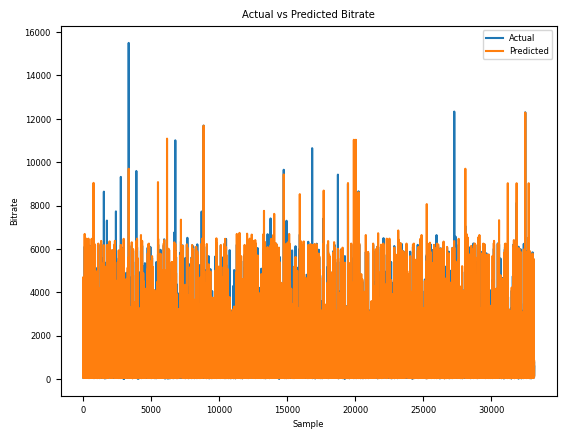

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

df = pd.read_csv('preprocessed_data_8.csv')

# Select features and target
X = df[['bitrate(video)', 'height', 'width']]
y = df['bitrate']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('Mean Absolute Error:', mae)
print('Coefficient of Determination (R^2):', r2)

import matplotlib.pyplot as plt
import numpy as np

# Create a new figure
plt.figure()

# Plot the actual values
plt.plot(np.arange(len(y_test)), y_test, label='Actual')

# Plot the predicted values
plt.plot(np.arange(len(y_test)), y_pred, label='Predicted')

# Set the labels and title
plt.xlabel('Sample')
plt.ylabel('Bitrate')
plt.title('Actual vs Predicted Bitrate')

# Add a legend
plt.legend()

# Display the plot
plt.show()

在此部分中，我们首先利用随机森林回归模型预测比特率。我们从预处理过的数据集中选择了'bitrate(video)', 'height', 'width'作为特征，'bitrate'作为目标。然后我们将数据划分为训练集和测试集，以便在训练后验证模型的表现。我们初始化了随机森林回归模型，并将其拟合到训练数据上。模型预测的效果通过平均平方误差(MSE)，根平均平方误差(RMSE)，平均绝对误差(MAE)和决定系数(R^2)来评估。通过比较实际值和预测值的图形，我们可以更直观地看到模型预测的准确性。

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('new_data_8.csv')

# select features and target
X = df.drop(columns=['category', 'id'])
y = df['category']

# Encode labels in target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6553644828453988


在第二部分，我们利用随机森林分类器对视频类别进行预测。我们从新的数据集中选择了特征并进行了标签编码，然后将数据划分为训练集和测试集。我们初始化了随机森林分类器，并将其拟合到训练数据上。模型预测的效果通过准确度来评估。

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('preprocessed_data_8.csv')

# select features and target
X = df.drop(columns=['category', 'id'])
y = df['category']

# Encode labels in target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
rf.fit(X_train, y_train)

# Predict
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.3222419982503243


这个部分用于对比，使用的数据集是未经过SMOTE过采样的不平衡数据集，可以证明本实验采用的方法大幅提高了分类准确率。